<a href="https://colab.research.google.com/github/adijams01/SDC_Projects/blob/main/TrafficSignClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting Data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!pwd

/content


In [7]:
import zipfile

zip_ref = zipfile.ZipFile("drive/My Drive/archive (3).zip", "r")
zip_ref.extractall()
zip_ref.close()

## Data Splitting

In [8]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import splitfolders
splitfolders.ratio('/content/train', output="output", seed=1337, ratio=(.8, 0,0.2)) 

Copying files: 39209 files [00:05, 7650.77 files/s]


In [10]:
import os

# Walk through  directory and list number of files
print("TRAIN---")
for dirpath, dirnames, filenames in os.walk("/content/output/train"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
print("TEST---")
for dirpath, dirnames, filenames in os.walk("/content/output/test"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

TRAIN---
There are 43 directories and 0 images in '/content/output/train'.
There are 0 directories and 960 images in '/content/output/train/18'.
There are 0 directories and 192 images in '/content/output/train/27'.
There are 0 directories and 1776 images in '/content/output/train/1'.
There are 0 directories and 1200 images in '/content/output/train/25'.
There are 0 directories and 960 images in '/content/output/train/35'.
There are 0 directories and 312 images in '/content/output/train/22'.
There are 0 directories and 1680 images in '/content/output/train/12'.
There are 0 directories and 1608 images in '/content/output/train/10'.
There are 0 directories and 1056 images in '/content/output/train/11'.
There are 0 directories and 1128 images in '/content/output/train/3'.
There are 0 directories and 168 images in '/content/output/train/0'.
There are 0 directories and 240 images in '/content/output/train/39'.
There are 0 directories and 480 images in '/content/output/train/26'.
There are 0 

In [11]:
train_dir="/content/output/train"
test_dir="/content/output/test/"
val_dir="/content/output/val/"

In [12]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['0' '1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21'
 '22' '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35'
 '36' '37' '38' '39' '4' '40' '41' '42' '5' '6' '7' '8' '9']


## Data Processing

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 31367 images belonging to 43 classes.
Found 7842 images belonging to 43 classes.


In [15]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();
     

## Baseline model

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense,Activation

In [36]:
# Create our model (baseline model)
model_1 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(43, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_1.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fit the model
history_2 = model_1.fit(train_data, # now 3 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))
     

Epoch 1/5
981/981 [==============================] - 55s 54ms/step - loss: 0.7260 - accuracy: 0.7993 - val_loss: 0.3344 - val_accuracy: 0.9068
Epoch 2/5
981/981 [==============================] - 55s 56ms/step - loss: 0.1409 - accuracy: 0.9620 - val_loss: 0.2189 - val_accuracy: 0.9402
Epoch 3/5
981/981 [==============================] - 53s 54ms/step - loss: 0.0757 - accuracy: 0.9780 - val_loss: 0.2665 - val_accuracy: 0.9383
Epoch 4/5
981/981 [==============================] - 55s 56ms/step - loss: 0.0703 - accuracy: 0.9815 - val_loss: 0.3359 - val_accuracy: 0.9213
Epoch 5/5
981/981 [==============================] - 55s 56ms/step - loss: 0.0484 - accuracy: 0.9863 - val_loss: 0.2570 - val_accuracy: 0.9521


In [37]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_39 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_41 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [38]:
# Evaluate on the test data
model_1.evaluate(test_data)

246/246 [==============================] - 10s 42ms/step - loss: 0.2570 - accuracy: 0.9521


[0.25701168179512024, 0.9520530700683594]

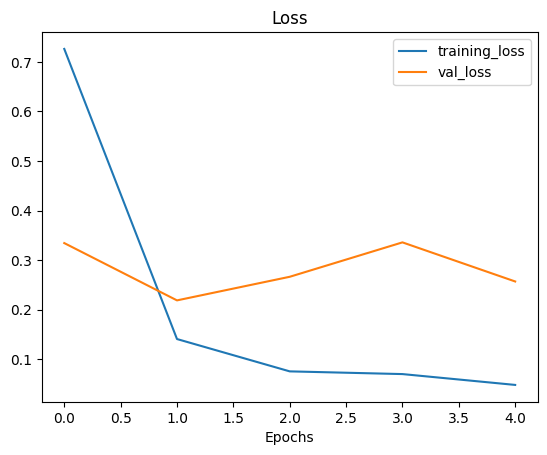

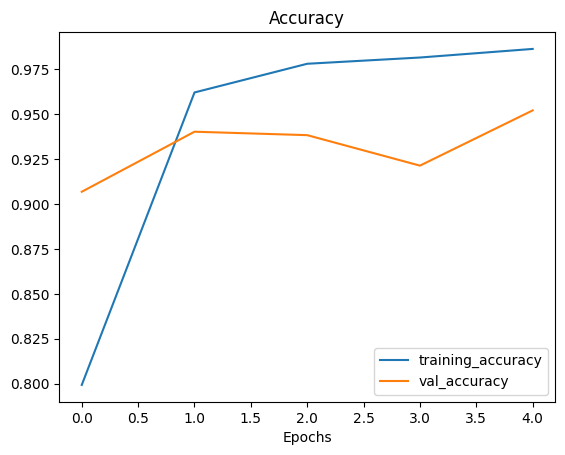

In [39]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_2)

In [18]:
# Create our model (baseline model)
model_2 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(43, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_2.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fit the model
history_1 = model_2.fit(train_data, # now 3 different classes 
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))
     

Epoch 1/10
981/981 [==============================] - 91s 87ms/step - loss: 0.8682 - accuracy: 0.7758 - val_loss: 0.2096 - val_accuracy: 0.9496
Epoch 2/10
981/981 [==============================] - 85s 87ms/step - loss: 0.1238 - accuracy: 0.9681 - val_loss: 0.1622 - val_accuracy: 0.9676
Epoch 3/10
981/981 [==============================] - 87s 88ms/step - loss: 0.0741 - accuracy: 0.9794 - val_loss: 0.1414 - val_accuracy: 0.9682
Epoch 4/10
981/981 [==============================] - 86s 88ms/step - loss: 0.0576 - accuracy: 0.9834 - val_loss: 0.1425 - val_accuracy: 0.9712
Epoch 5/10
981/981 [==============================] - 87s 88ms/step - loss: 0.0438 - accuracy: 0.9876 - val_loss: 0.1248 - val_accuracy: 0.9770
Epoch 6/10
981/981 [==============================] - 85s 87ms/step - loss: 0.0351 - accuracy: 0.9903 - val_loss: 0.0972 - val_accuracy: 0.9802
Epoch 7/10
981/981 [==============================] - 85s 87ms/step - loss: 0.0236 - accuracy: 0.9931 - val_loss: 0.1531 - val_accuracy:

In [42]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_16 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_17 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 conv2d_18 (Conv2D)          (None, 216, 216, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 214, 214, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 107, 107, 10)     0         
 2D)                                                             
                                                      

In [40]:
# Evaluate on the test data
model_2.evaluate(test_data)

246/246 [==============================] - 11s 45ms/step - loss: 0.1336 - accuracy: 0.9763


[0.13360974192619324, 0.9762815833091736]

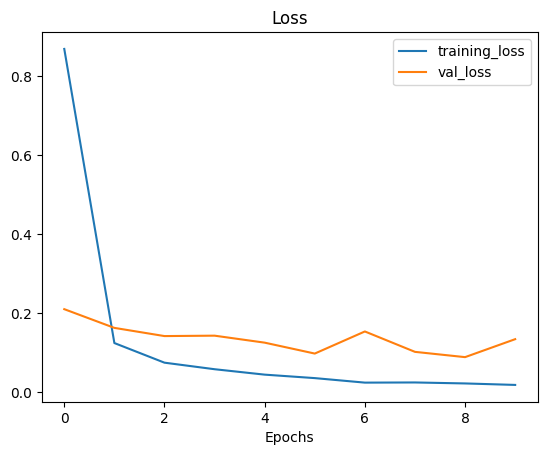

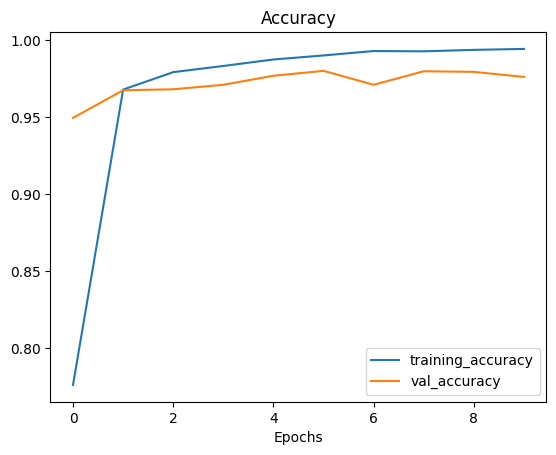

In [41]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_1)

## Predictions

In [23]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [24]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [25]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)
     

['0' '1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21'
 '22' '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35'
 '36' '37' '38' '39' '4' '40' '41' '42' '5' '6' '7' '8' '9']


In [30]:
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 26ms/step


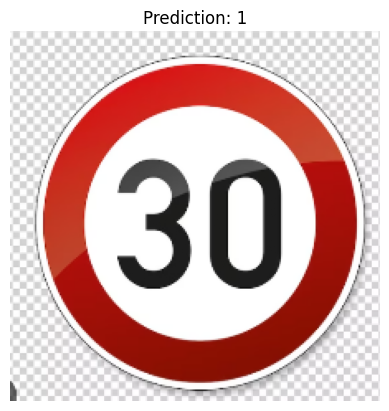

In [31]:
# Make a prediction using efficienet_2_model
pred_and_plot(model=model_2, 
              filename="/content/30kmph2.png", 
              class_names=class_names)

1/1 [==============================] - 0s 21ms/step


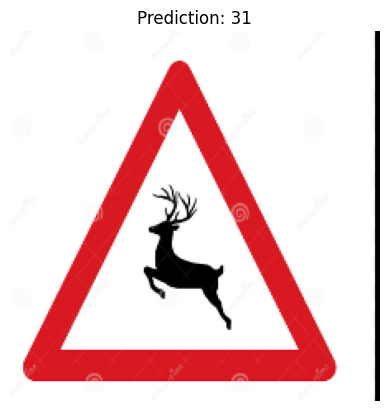

In [33]:
# Make a prediction using efficienet_2_model
pred_and_plot(model=model_2, 
              filename="/content/deer.png", 
              class_names=class_names)